<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.


## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>

Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [143]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 1. Definición del problema

#### Contexto

Este es el conjunto de datos utilizado en el segundo capítulo del reciente libro de Aurélien Géron, "Aprendizaje automático práctico con Scikit-Learn y TensorFlow". Sirve como una excelente introducción a la implementación de algoritmos de aprendizaje automático, ya que requiere una limpieza de datos rudimentaria, tiene una lista de variables fácilmente comprensible y su tamaño óptimo es ideal, entre demasiado "de juguete" y demasiado complejo.

Los datos contienen información del censo de California de 1990. Por lo tanto, aunque no ayude a predecir los precios actuales de la vivienda como el conjunto de datos Zillow Zestimate, sí proporciona un conjunto de datos introductorio accesible para enseñar los fundamentos del aprendizaje automático.

#### Contenido

Los datos corresponden a las viviendas encontradas en un distrito determinado de California y a algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpiaron, por lo que se requieren algunos pasos de preprocesamiento.

#### Objetivo

El objetivo del proyecto es predecir `median_house_value` (USD) a partir de las covariables dadas.

### 2. Estadística descriptiva

In [144]:
# Info del dataset (Tipos de datos, datos no nulos, total de datos)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [145]:
# Estadísticos descriptivos
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [146]:
# valores nulos
housing.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [147]:
# Comprobar filas duplicadas
housing.duplicated().sum()

np.int64(0)

In [148]:
# Matriz de correlacion
housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


El DataFrame no tiene valores nulos ni duplicados. Todos sus datos son numéricos (float). De la descripción estadística de cada columna, es destacable que las variables `AveRooms`, `AveBedrms` y `target` parecen tener outliers, pues sus datos máximos están muy alejados del tercer cuartil. Asimismo, la variable `MedInc` es la que tiene la mayor correlación con la variable `target`, lo cual podría estar indicando (aunque no necesariamente) que será la variable más significativa en la predicción. Por útlimo, es posible observar que las unidades y rangos de las variables son bastante diversos; los valores más altos pueden interpretarse como más importantes, por lo que definitivamente debemos considerar el escalamiento.

### 3. Visualización descriptiva

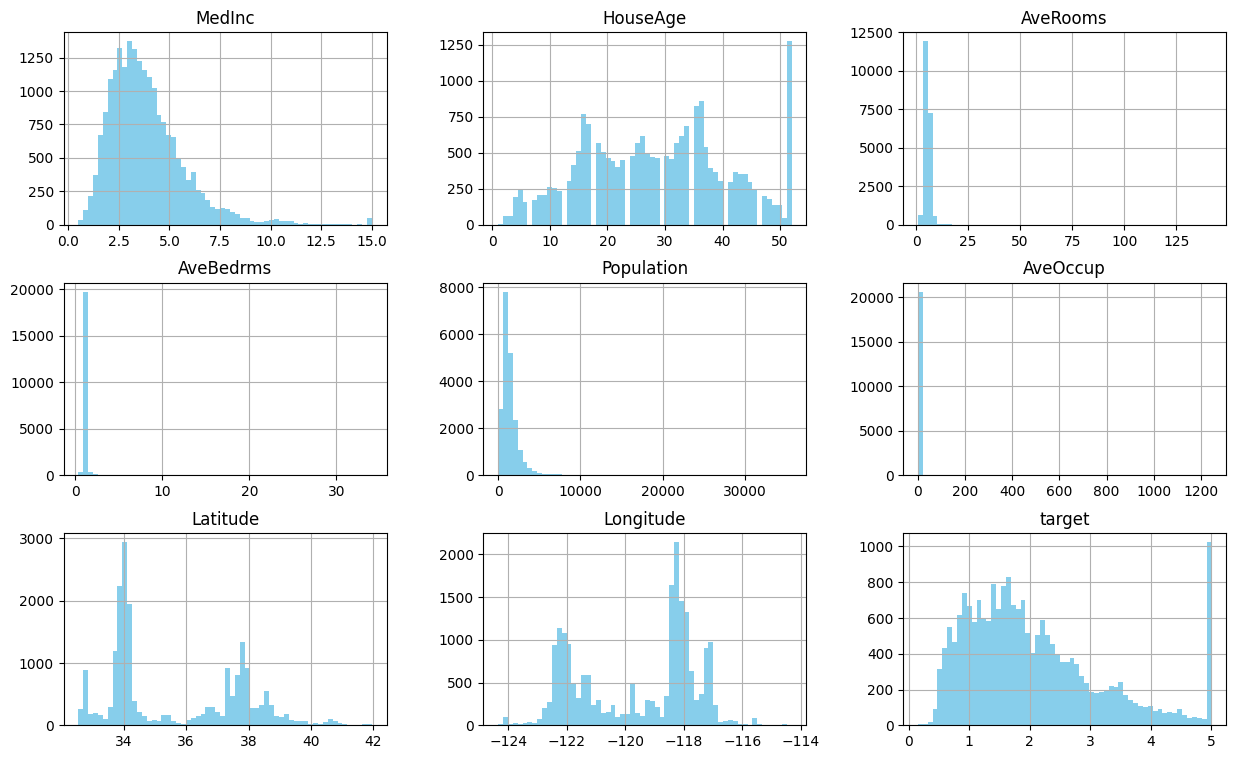

In [149]:
# Distribución de los datos
housing.hist(bins=60, figsize=(15,9),color="skyblue");plt.show()

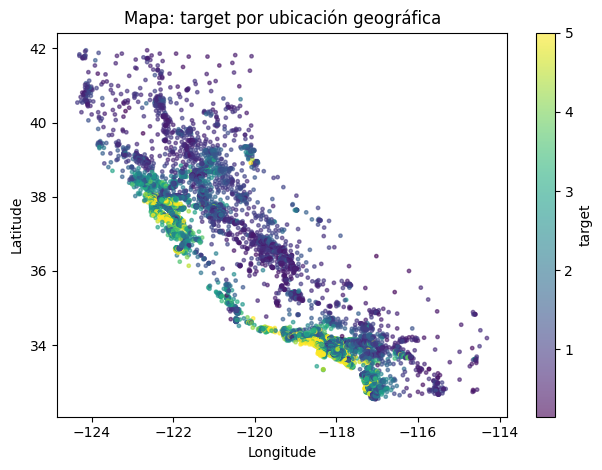

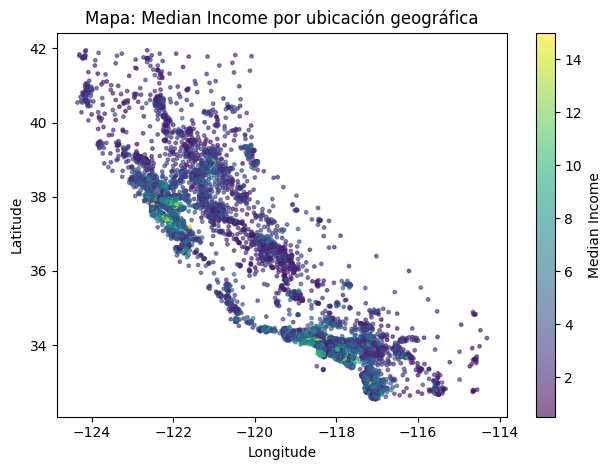

In [150]:
# Dispersión geográfica de target
plt.figure()
sc = plt.scatter(housing['Longitude'], housing['Latitude'], c=housing["target"], s=6, alpha=0.6)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('Mapa: target por ubicación geográfica')
plt.colorbar(sc, label="target")
plt.tight_layout()
plt.show()

# Dispersión geográfica de MedInc
plt.figure()
sc = plt.scatter(housing['Longitude'], housing['Latitude'], c=housing["MedInc"], s=6, alpha=0.6)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('Mapa: Median Income por ubicación geográfica')
plt.colorbar(sc, label="Median Income")
plt.tight_layout()
plt.show()

De los histogramas, podemos confirmar los outliers presentes en nuestro DataFrame. Por otro lado, la columna `HouseAge` tiene varios peaks locales, pero uno bastante extraño en su valor máximo, asi como cierto grado de discontinuidad en los datos. La variable `target` también posee un peak extraño en su valor máximo.

De los gráficos de dispersión, es posible ver que, para la variable `target` (median_house_value), la ubicación geográfica y la columna `HouseAge` tienen una clara relación: generalmente aumentan cuanto más se acerca uno a los dos grupos principales, por lo que estas dos variables probablemente serían importantes.

### 4. Preprocesamiento

Es probable que el peak de la variable `target` sea debido a una suma definida por todos los casos mayores al valor máximo de median_house_value considerado durante el muestreo. Lo mismo puede explicar el fenómeno observado en `HouseAge`.

Asimismo, la forma de los histogramas de `AveRooms`, `AveBedrms`, `Population` y `AveOccup` puede deberse a outliers con valores extremos. Por esta razón, quitaremos los datos por encima del percentil 99.5.

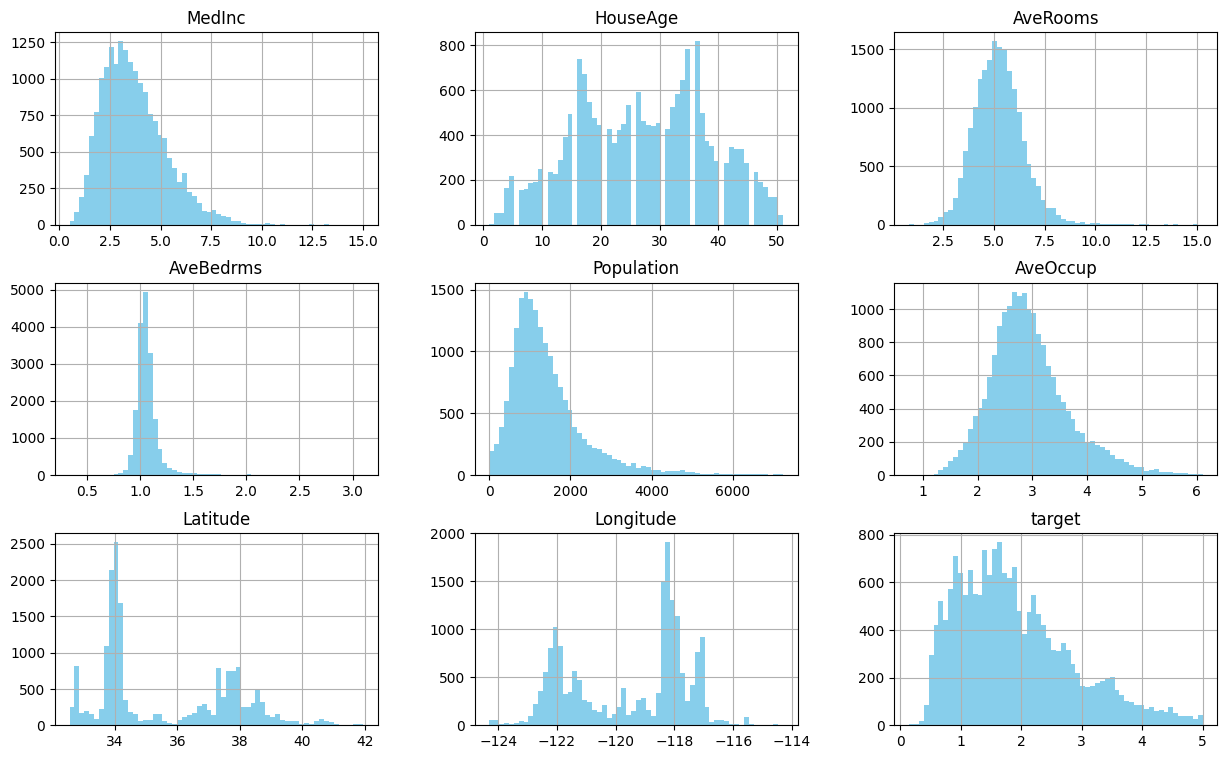

In [151]:
# Primero, trabajamos outliers
maxval1 = housing['HouseAge'].max() # Obtenemos el valor maximo de HouseAge
maxval2 = housing['target'].max() # Obtenemos el valor maximo de target
p995_ave_rooms = housing['AveRooms'].quantile(0.995) # Obtenemos el percentil 99.5 de AveRooms
p995_ave_bedrms = housing['AveBedrms'].quantile(0.995) # Obtenemos el percentil 99.5 de AveBedrms
p995_population = housing['Population'].quantile(0.995) # Obtenemos el percentil 99.5 de Population
p995_ave_occup = housing['AveOccup'].quantile(0.995) # Obtenemos el percentil 99.5 de AveOccup
housing_upd = housing[(housing['target'] != maxval2) & (housing['HouseAge'] != maxval1)
               & (housing["AveRooms"]<p995_ave_rooms) & (housing["AveBedrms"]<p995_ave_bedrms)
               & (housing["Population"]<p995_population) & (housing["AveOccup"]<p995_ave_occup)]
housing_upd.hist(bins=60, figsize=(15,9),color="skyblue");plt.show()

Crearemos algunas variables que son combinaciones de los datos disponibles.

In [152]:
housing_upd['DiagCoord'] = (housing_upd['Longitude'] + housing_upd['Latitude'])  # 'coordenada diagonal'
housing_upd['BedPerRoom'] = housing_upd['AveBedrms']/housing_upd['AveRooms']     # razon de bedrooms/room
housing_upd.corr()

/tmp/ipython-input-1652842969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_upd['DiagCoord'] = (housing_upd['Longitude'] + housing_upd['Latitude'])  # 'coordenada diagonal'
/tmp/ipython-input-1652842969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_upd['BedPerRoom'] = housing_upd['AveBedrms']/housing_upd['AveRooms']     # razon de bedrooms/room


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,DiagCoord,BedPerRoom
MedInc,1.000000,-0.200054,0.599997,-0.170075,0.021892,-0.056154,-0.073936,-0.018508,0.663459,-0.240449,-0.636874
HouseAge,-0.200054,1.000000,-0.262343,-0.145592,-0.286117,0.079575,-0.051702,-0.030700,0.017017,-0.211497,0.145563
AveRooms,0.599997,-0.262343,1.000000,0.397747,-0.071855,-0.056306,0.153712,-0.082908,0.239255,0.203511,-0.775894
AveBedrms,-0.170075,-0.145592,0.397747,1.000000,-0.053129,-0.118715,0.075810,0.017658,-0.118134,0.243323,0.155797
Population,0.021892,-0.286117,-0.071855,-0.053129,1.000000,0.188568,-0.115551,0.100980,0.012892,-0.058607,0.065037
AveOccup,-0.056154,0.079575,-0.056306,-0.118715,0.188568,1.000000,-0.170386,0.170498,-0.245962,-0.033686,0.006959
Latitude,-0.073936,-0.051702,0.153712,0.075810,-0.115551,-0.170386,1.000000,-0.925538,-0.171730,0.381123,-0.146375
Longitude,-0.018508,-0.030700,-0.082908,0.017658,0.100980,0.170498,-0.925538,1.000000,-0.022341,-0.002669,0.118112
target,0.663459,0.017017,0.239255,-0.118134,0.012892,-0.245962,-0.171730,-0.022341,1.000000,-0.508074,-0.228586
DiagCoord,-0.240449,-0.211497,0.203511,0.243323,-0.058607,-0.033686,0.381123,-0.002669,-0.508074,1.000000,-0.098182


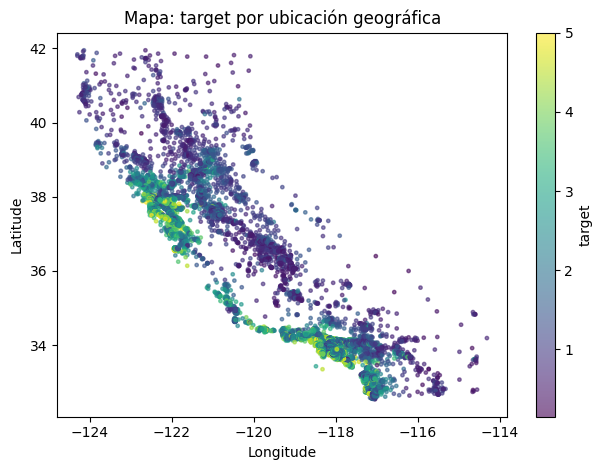

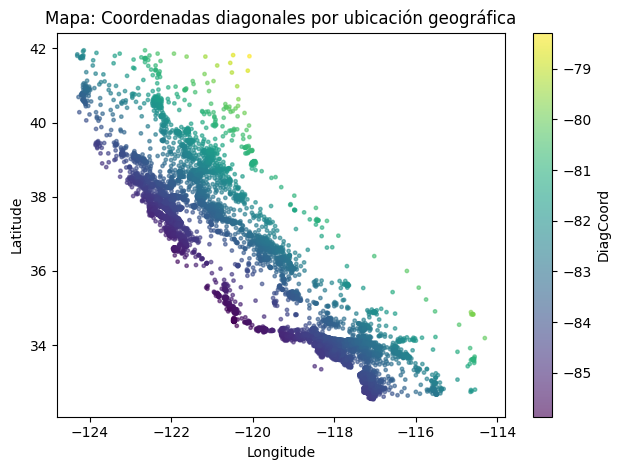

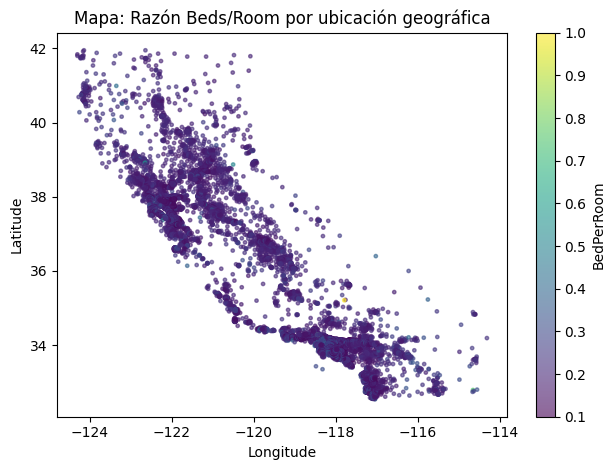

In [153]:
# Dispersión geográfica de target
plt.figure()
sc = plt.scatter(housing_upd['Longitude'], housing_upd['Latitude'], c=housing_upd["target"], s=6, alpha=0.6)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('Mapa: target por ubicación geográfica')
plt.colorbar(sc, label="target")
plt.tight_layout()
plt.show()

# Dispersión geográfica de DiagCoords
plt.figure()
sc = plt.scatter(housing_upd['Longitude'], housing_upd['Latitude'], c=housing_upd["DiagCoord"], s=6, alpha=0.6)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('Mapa: Coordenadas diagonales por ubicación geográfica')
plt.colorbar(sc, label="DiagCoord")
plt.tight_layout()
plt.show()

# Dispersión geográfica de BedPerRoom
plt.figure()
sc = plt.scatter(housing_upd['Longitude'], housing_upd['Latitude'], c=housing_upd["BedPerRoom"], s=6, alpha=0.6)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('Mapa: Razón Beds/Room por ubicación geográfica')
plt.colorbar(sc, label="BedPerRoom")
plt.tight_layout()
plt.show()

Es posible notar una clara correlación (inversa) entre `DiagCoord` y `target`. Por otro lado, lamentablemente, `BedsPerRoom` no se ve tan iluminada como se esperaba, pero sigue siendo la tercera variable con la correlación más alta con `target`.

In [154]:
housing_upd.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,DiagCoord,BedPerRoom
count,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000
mean,3.690229,27.141082,5.259772,1.072099,1430.015433,2.946248,35.586832,-119.490900,1.897840,-83.904068,0.214077
std,1.565309,11.374097,1.255322,0.154964,952.618616,0.718408,2.144444,1.982597,0.959287,0.812005,0.055339
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.300000,0.149990,-85.870000,0.100000
25%,2.536300,18.000000,4.425743,1.005168,816.000000,2.469432,33.920000,-121.570000,1.152000,-84.400000,0.177199
50%,3.463000,27.000000,5.196751,1.047619,1203.000000,2.855042,34.230000,-118.450000,1.714000,-84.150000,0.203924
75%,4.612500,36.000000,5.967880,1.097701,1770.000000,3.314286,37.670000,-117.980000,2.436000,-83.450000,0.240404
max,15.000100,51.000000,15.272727,3.099338,7228.000000,6.110410,41.950000,-114.310000,5.000000,-78.290000,1.000000


La cantidad de datos se ha reducido a 18273.

### 5. Selección de modelo

Aplicaremos los siguientes modelos:


*   Linear Regression
*   Bayesian Regression
*   K-Nearest Neighbors Regression
*   Decision Tree Regression



In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# features, target
X = housing_upd.drop(columns="target").values
y = housing_upd["target"].values
y_pred_dict = {} # Diccionario para guardar predicciones

In [156]:
# Reutilizamos codigo de la clase
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]
    df_result['r2'] =  round(r2_score(y_true, y_pred),4)

    return df_result

#### Regresión Lineal

In [157]:
# Tenemos 18273 datos -> elegimos 20% de los datos para testear
# Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 281)
# Escalar variables
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)  # fit SOLO en train
X_test_s  = scaler.transform(X_test)       # transform en test

In [158]:
from sklearn.linear_model import LinearRegression
# Ajustar el modelo
reg_lineal = LinearRegression() # Creando el modelo
reg_lineal.fit(X_train_s, y_train)  # ajustando el modelo
y_pred = reg_lineal.predict(X_test_s) # prediciones
y_pred_dict["reg_lineal"] = y_pred

In [159]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)
# Mostramos principales métricas
df_metrics_1 = regression_metrics(df_temp)
df_metrics_1

,mae,mse,rmse,mape,smape,r2
0,0.4286,0.331,0.5753,27.7528,0.4345,0.6484


#### Bayesian Regression

In [160]:
# Tenemos 18273 datos -> elegimos 20% de los datos para testear
# Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 281)
# Escalar variables
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)  # fit SOLO en train
X_test_s  = scaler.transform(X_test)       # transform en test

In [161]:
from sklearn.linear_model import BayesianRidge
# Ajustar el modelo
reg_bayes = BayesianRidge() # Creando el modelo
reg_bayes.fit(X_train_s, y_train)  # ajustando el modelo
y_pred = reg_bayes.predict(X_test_s) # prediciones
y_pred_dict["reg_bayes"] = y_pred

In [162]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)
# Mostramos principales métricas
df_metrics_2 = regression_metrics(df_temp)
df_metrics_2

,mae,mse,rmse,mape,smape,r2
0,0.4286,0.331,0.5753,27.7536,0.4345,0.6484


#### K-Nearest Neighbors

In [163]:
# Tenemos 18273 datos -> elegimos 20% de los datos para testear
# Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 281)
# Escalar variables
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)  # fit SOLO en train
X_test_s  = scaler.transform(X_test)       # transform en test

In [164]:
from sklearn.neighbors import KNeighborsRegressor
# Ajustar el modelo
reg_knn = KNeighborsRegressor(5,weights='uniform') # Creando el modelo
reg_knn.fit(X_train_s, y_train)  # ajustando el modelo
y_pred = reg_knn.predict(X_test_s) # prediciones
y_pred_dict["knn"] = y_pred

In [165]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)
# Mostramos principales métricas
df_metrics_3 = regression_metrics(df_temp)
df_metrics_3

,mae,mse,rmse,mape,smape,r2
0,0.3417,0.2444,0.4944,20.3572,0.3383,0.7403


#### Decision Tree Regressor

In [166]:
# Tenemos 18273 datos -> elegimos 20% de los datos para testear
# Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 281)
# Escalar variables
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)  # fit SOLO en train
X_test_s  = scaler.transform(X_test)       # transform en test

In [167]:
from sklearn.tree import DecisionTreeRegressor
# Ajustar el modelo
reg_tree = DecisionTreeRegressor(max_depth=5) # Creando el modelo
reg_tree.fit(X_train_s, y_train)  # ajustando el modelo
y_pred = reg_tree.predict(X_test_s) # prediciones
y_pred_dict["decision_tree"] = y_pred

In [168]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)
# Mostramos principales métricas
df_metrics_4 = regression_metrics(df_temp)
df_metrics_4

,mae,mse,rmse,mape,smape,r2
0,0.4235,0.3337,0.5777,25.9192,0.4117,0.6455


### 6. Métricas y análisis de resultados

In [169]:
df_metrics_1["modelo"] = ["reg_lineal"]
df_metrics_2["modelo"] = ["reg_bayesian"]
df_metrics_3["modelo"] = ["knn"]
df_metrics_4["modelo"] = ["decision_tree"]
# Juntamos todas las metricas
df_metrics = pd.concat([df_metrics_1,df_metrics_2,df_metrics_3,df_metrics_4]).sort_values('rmse')
df_metrics = df_metrics.set_index('modelo')
df_metrics

,mae,mse,rmse,mape,smape,r2
modelo,,,,,,
knn,0.3417,0.2444,0.4944,20.3572,0.3383,0.7403
reg_lineal,0.4286,0.3310,0.5753,27.7528,0.4345,0.6484
reg_bayesian,0.4286,0.3310,0.5753,27.7536,0.4345,0.6484
decision_tree,0.4235,0.3337,0.5777,25.9192,0.4117,0.6455


De acuerdo a la tabla, el mejor modelo corresponde al modelo de K-Nearest Neighbors, pues tiene el menor MAE/MSE/RMSE/MAPE/SMAPE y el mayor R^2 (0.7403). Por otro lado, los modelos de Regresión Lineal y Bayesiana rinden prácticamente igual (mismas métricas), y el árbol de decisión queda muy cerca de ellas.

Con R^2 = 0.74 aprox., KNN explica aprox. 74% de la varianza del objetivo; los otros modelos se quedan en 0.65 aprox.

### 7. Visualización de resultados del modelo

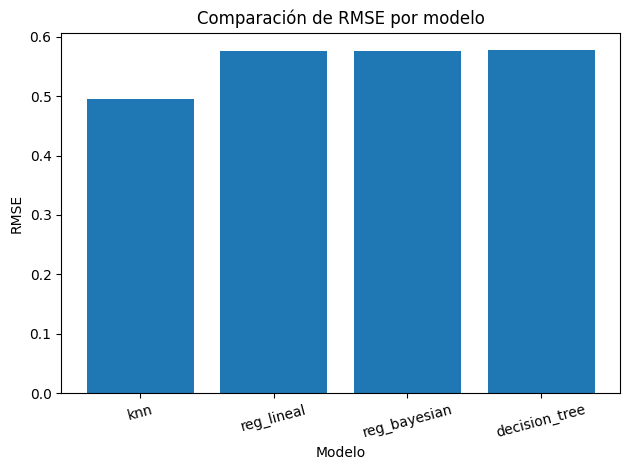

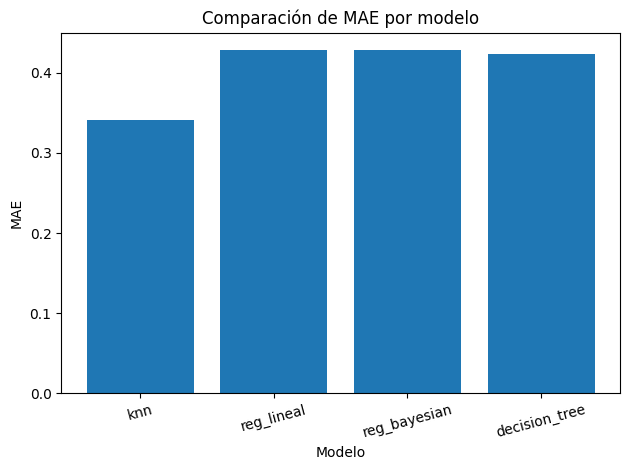

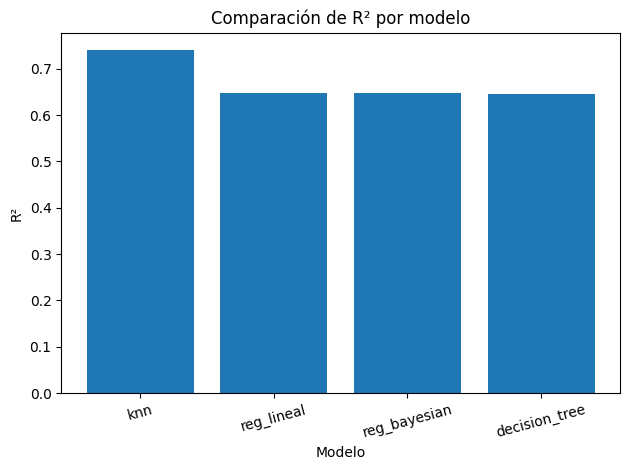

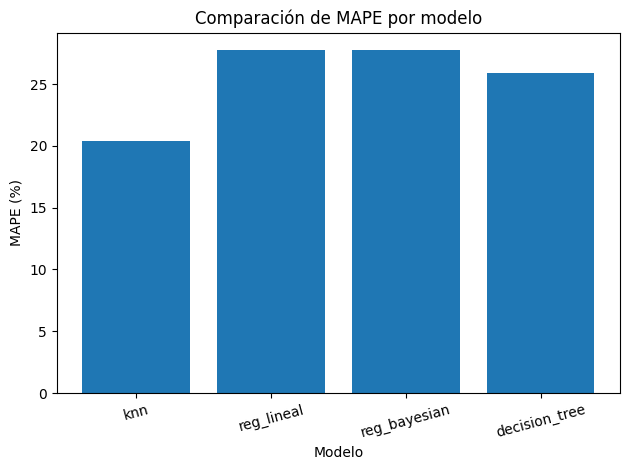

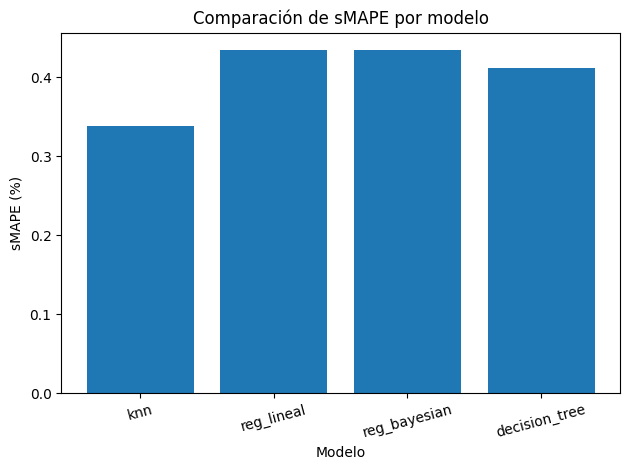

In [170]:
# Funcion para graficar la columna df[col]
def bar_metric(df, col, title, ylabel):
    plt.figure()
    plt.bar(df.index, df[col])
    plt.title(title)
    plt.xlabel("Modelo")
    plt.ylabel(ylabel)
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

bar_metric(df_metrics, "rmse", "Comparación de RMSE por modelo", "RMSE")
bar_metric(df_metrics, "mae",  "Comparación de MAE por modelo",  "MAE")
bar_metric(df_metrics, "r2",   "Comparación de R² por modelo",   "R²")
bar_metric(df_metrics, "mape",  "Comparación de MAPE por modelo",  "MAPE (%)")
bar_metric(df_metrics, "smape", "Comparación de sMAPE por modelo", "sMAPE (%)")

K-Nearest Neighbors tiene el menor MAE/MSE/RMSE/MAPE/SMAPE y el mayor R^2 (0.7403).

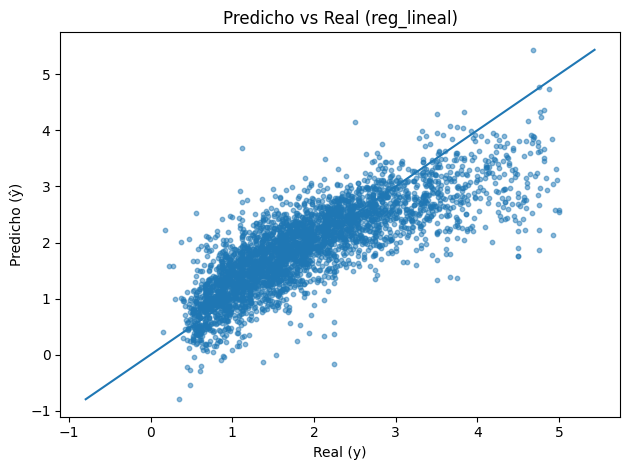

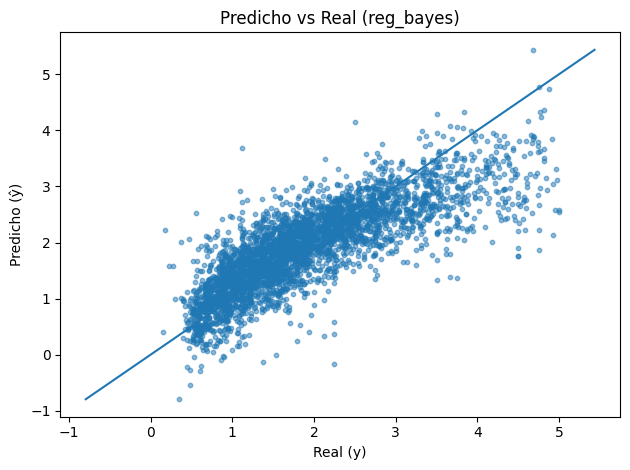

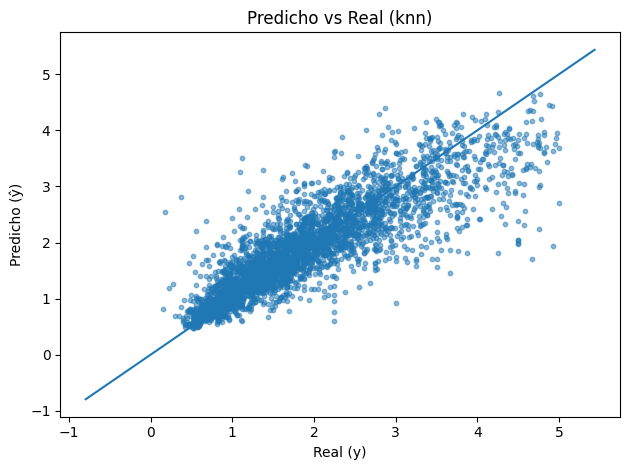

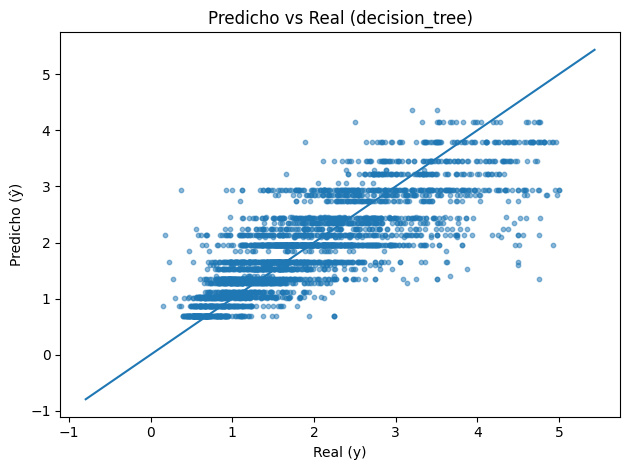

In [171]:
lo = min(y_test.min(), *(p.min() for p in y_pred_dict.values()))
hi = max(y_test.max(), *(p.max() for p in y_pred_dict.values()))

for modelo in y_pred_dict:
    plt.figure()
    plt.scatter(y_test, y_pred_dict[modelo], s=10, alpha=0.5)
    plt.plot([lo, hi], [lo, hi])  # línea y=x
    plt.title(f"Predicho vs Real ({modelo})")
    plt.xlabel("Real (y)")
    plt.ylabel("Predicho (ŷ)")
    plt.tight_layout()
    plt.show()

Idealmente, los puntos se alinean cerca de la línea y=x. Podemos ver que KNN es el modelo con los puntos más cerca a esta línea, mientras que Decision Tree tiene mucha dispersión. Por otra parte, los patrones curvos observados cerca de valores mayores de la variable `target` sugieren no linealidad o heteroscedasticidad (dependencia de los errores con las variables).

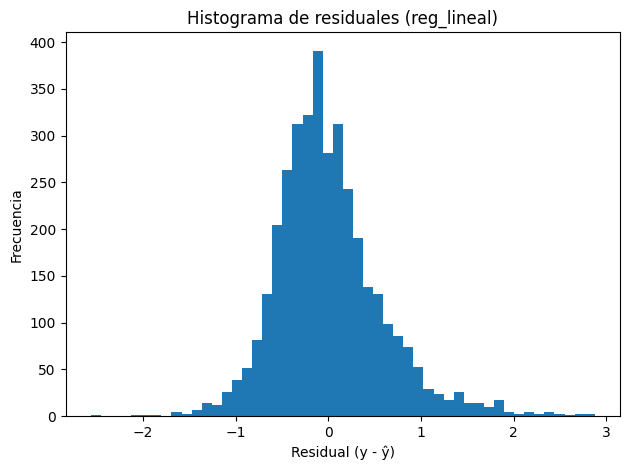

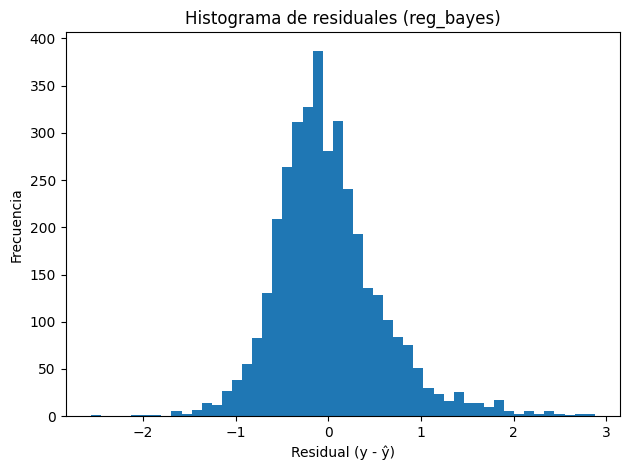

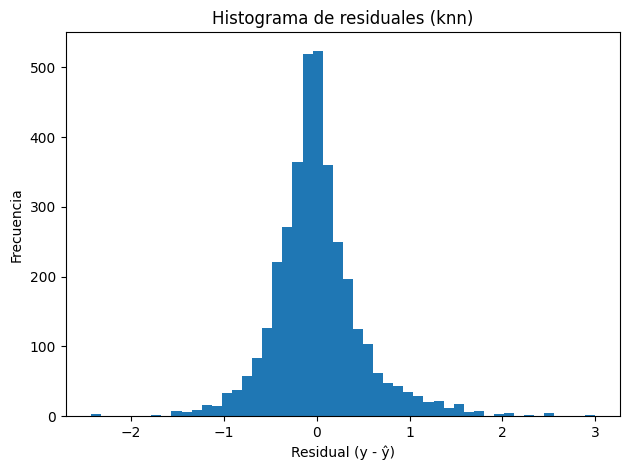

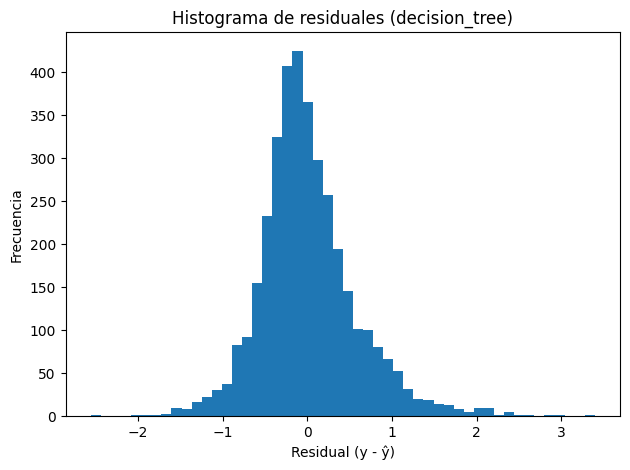

In [172]:
for modelo in y_pred_dict:
    resid = y_test - y_pred_dict[modelo]
    plt.figure()
    plt.hist(resid, bins=50)
    plt.title(f"Histograma de residuales ({modelo})")
    plt.xlabel("Residual (y - ŷ)")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

Todas las distribuciones de los errores de los modelos están centradas cerca de 0 con forma acampanada. No obstante, tienen cierta asimetría hacia la derecha, indicando que los modelos estiman un valor menor que el real; esto puede deberse a los altos y "caros" precios que toma la variable `target`.

### 8. Conclusiones

Hemos logrado entrenar cuatro modelos de Machine Learning para predecir el valor medio de las propiedades en un distrito determinado de California durante 1990. De los cuatro, el mejor modelo fue K-Nearest Neighbors, con un R^2 de 0.74, mientras que los modelos de Regresión Lineal y Bayesiana tuvieron rendimientos similares con un R^2 de 0.65 aproximadamente.

Un R^2 de 0.74 indica que KNN explica el 74% de la varianza de la variable objetivo. No obstante, todavía hay un 26% de varianza no explicada. Para reducir este número, se podrían afinar los hiperparámetros de los modelos de regresión, así como probar otros modelos, como Random Forest o Gradient Boosting. Por otra parte, del gráfico de dispersión de las predicciones, se pudo observar cierto grado de no linealidad; por ende, se podrían aplicar transformaciones de la variable objetivo u otros modelos que incluyan esa no linealidad.

En definitiva, hemos logrado predecir el valor medio de las propiedades, aunque aún es posible obtener mejores resultados.

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [173]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [174]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [175]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [176]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 64 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [177]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [178]:
# Primero, revisamos los tipos de datos y si hay nulos
print("Data Info:")
digits.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c2

¿Hay datos nulos?

No, no hay datos nulos. Todas las columnas tienen 1797 datos.

¿Qué tipo de datos son?

Todos los datos son enteros.

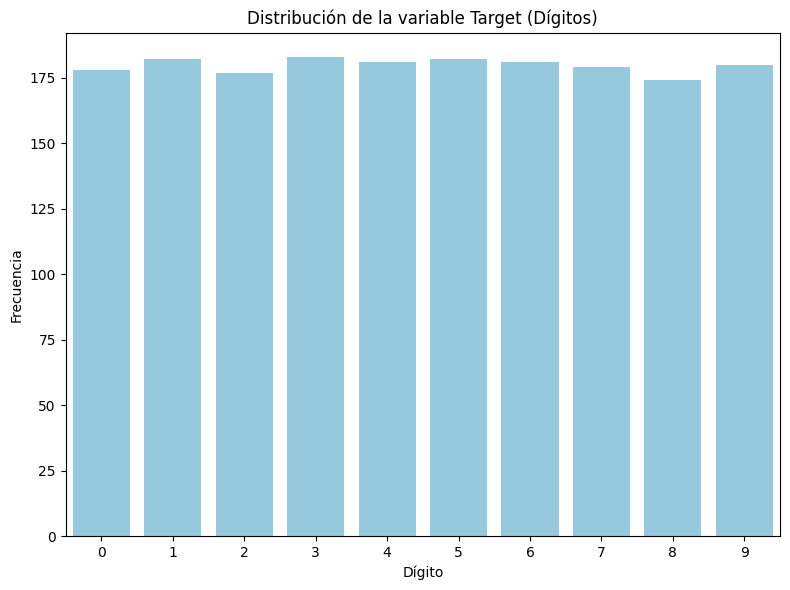

In [179]:
# Vemos la distribucion de la variable target
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=digits, color='skyblue')
plt.title('Distribución de la variable Target (Dígitos)')
plt.xlabel('Dígito')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

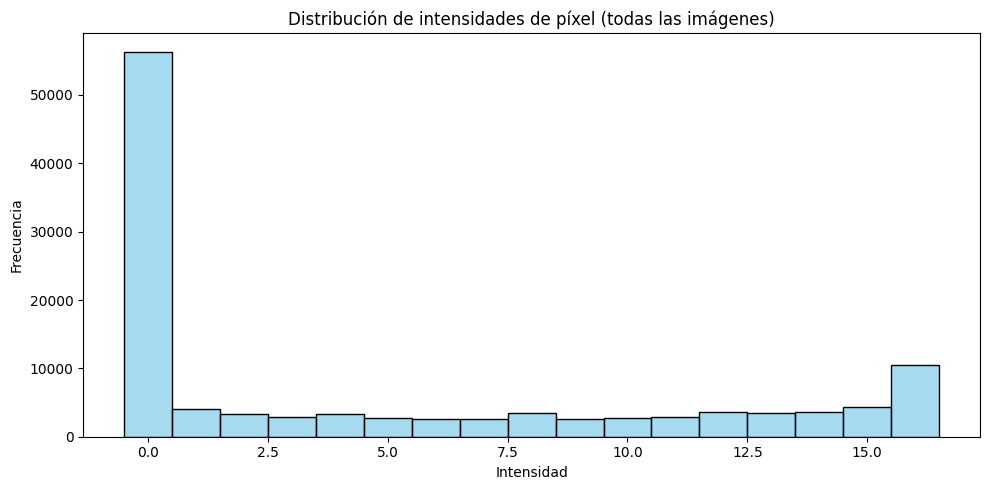

In [180]:
# Vemos la distribución de los colores de pixeles
# Convertimos los datos de los pixeles en un np_array de 1D
pix_vals = digits.drop(columns=["target"]).to_numpy().ravel()
# Escogemos separaciones para cada entero
bins = np.arange(-0.5, 16.5 + 1, 1)
plt.figure(figsize=(10,5))
sns.histplot(pix_vals, bins=bins, color="skyblue")
plt.title("Distribución de intensidades de píxel (todas las imágenes)")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

¿Cómo se distribuyen los datos?

Los datos de la variable Target se distribuyen de manera bastante balanceada: todos tienen una cantidad parecida de datos, entre 178 a 183. Por otro lado, la distribución de la intensidad de píxel de todas las imágenes presenta una predominante presencia de ceros (blanco), y una cola hacia valores altos hasta un peak local en el 16.

In [181]:
# Chequeamos el uso de memoria
print("Uso de memoria:")
digits.memory_usage(deep=True).sum() / (1024 ** 2)  # en MiB

Uso de memoria:


np.float64(0.8912773132324219)

¿Cuánta memoria estoy utilizando?

Se están utilizando 0.89 MB de memoria.

In [182]:
digits["target"].value_counts().sort_index()

,count
target,
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174


¿Cuántos registros por clase hay?

Hay entre 174 y 183 registros por clase. La clase con más registros es el dígito 3, mientras que la clase con menos registros es el dígito 8.

In [183]:
# Lista con todas las columnas excepto target
feature_cols = [f"c{i:02d}" for i in range(64)]

# Chequeos de integridad y consistencia
pix = digits[feature_cols].to_numpy()

nan_feat = int(np.isnan(pix).sum())
nan_tgt  = int(pd.isna(digits["target"]).sum())

inf_feat = int(np.isinf(pix).sum())
inf_tgt  = int(np.isinf(digits["target"]).sum())

below_zero = int((pix < 0).sum())
above_16   = int((pix > 16).sum())

# píxeles no enteros (tolerancia para flotante)
non_integer_pix = int(np.sum(np.abs(pix - np.round(pix)) > 1e-9))

# targets fuera de 0..9
tgt_out_of_range = int(((digits["target"] < 0) | (digits["target"] > 9)).sum())

# duplicados
dup_full = int(digits.duplicated(keep=False).sum())
dup_only_X = int(digits.duplicated(subset=feature_cols, keep=False).sum())

# imágenes absolutamente en blanco
ink = pix.sum(axis=1)
all_blank = int((ink == 0).sum())

checks = pd.DataFrame({
    "check": [
        "NaN en features", "NaN en target",
        "Inf en features", "Inf en target",
        "Píxeles < 0", "Píxeles > 16",
        "Píxeles no enteros (toler 1e-9)",
        "Targets fuera de 0..9",
        "Duplicados (fila completa)",
        "Duplicados (solo X)",
        "Imágenes completamente en blanco",
    ],
    "count": [
        nan_feat, nan_tgt,
        inf_feat, inf_tgt,
        below_zero, above_16,
        non_integer_pix,
        tgt_out_of_range,
        dup_full,
        dup_only_X,
        all_blank,
    ]
})
checks["status"] = np.where(checks["count"] == 0, "OK", "REVISAR")

checks

,check,count,status
0,NaN en features,0,OK
1,NaN en target,0,OK
2,Inf en features,0,OK
3,Inf en target,0,OK
4,Píxeles < 0,0,OK
5,Píxeles > 16,0,OK
6,Píxeles no enteros (toler 1e-9),0,OK
7,Targets fuera de 0..9,0,OK
8,Duplicados (fila completa),0,OK
9,Duplicados (solo X),0,OK


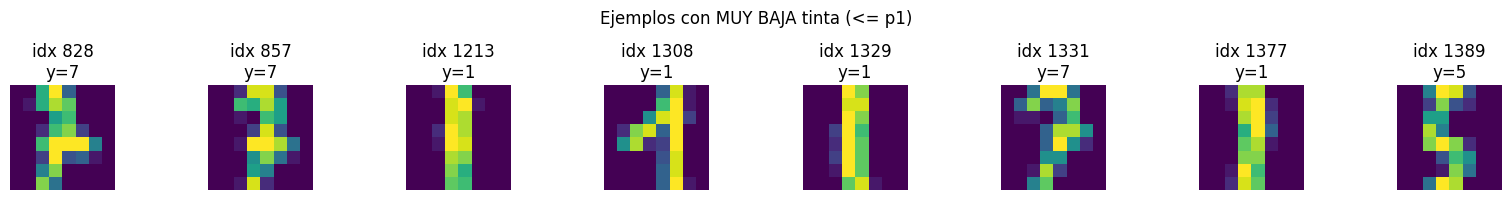

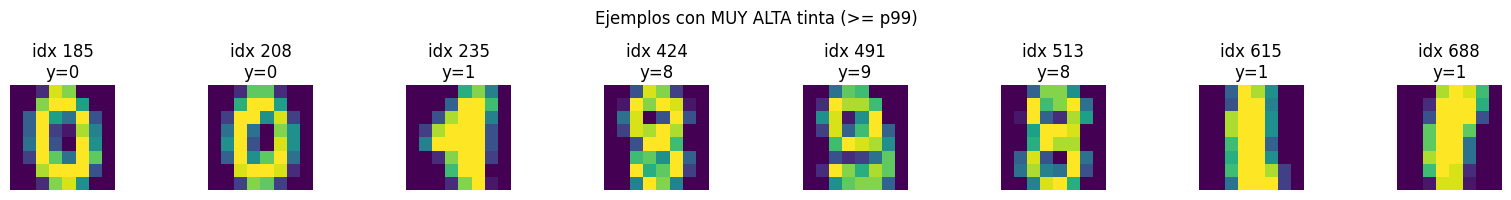

In [184]:
# extremos por "tinta"
q1, q99 = np.percentile(ink, [1, 99])
low_ink_idx = np.where(ink <= q1)[0][:8]
high_ink_idx = np.where(ink >= q99)[0][:8]

# Visualizar extremos por "tinta" (cada gráfico en su figura; sin estilos/colores explícitos)
def show_examples(indices, title):
    cols = 8
    rows = 1 if len(indices) <= cols else int(np.ceil(len(indices)/cols))
    plt.figure(figsize=(2*cols, 2*rows))
    for i, idx in enumerate(indices[:cols*rows]):
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(pix[idx].reshape(8,8))  # sin especificar cmap
        ax.set_title(f"idx {idx}\ny={digits.loc[idx,'target']}")
        ax.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_examples(low_ink_idx,  "Ejemplos con MUY BAJA tinta (<= p1)")
show_examples(high_ink_idx, "Ejemplos con MUY ALTA tinta (>= p99)")

¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

De acuerdo al chequeom, podemos observar que no hay valores NaN ni Inf, no hay pixeles fuera del rango 0-16 ni dígitos de la variable Target fuera del rango 0-9. Asimismo, no hay datos duplicados ni imágenes completamente en blanco.

Por otro lado, las imágenes con valores muy bajos y muy altos de "tinta" (suma de la intensidad de pixeles) parecen ser dígitos válidos.

En conclusión, no hay registros que no se correspondan con el conocimiento previo de los datos, pues todo lo que hemos extraido del DataSet no contradice lo mencionado en la descripción del mismo.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [185]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

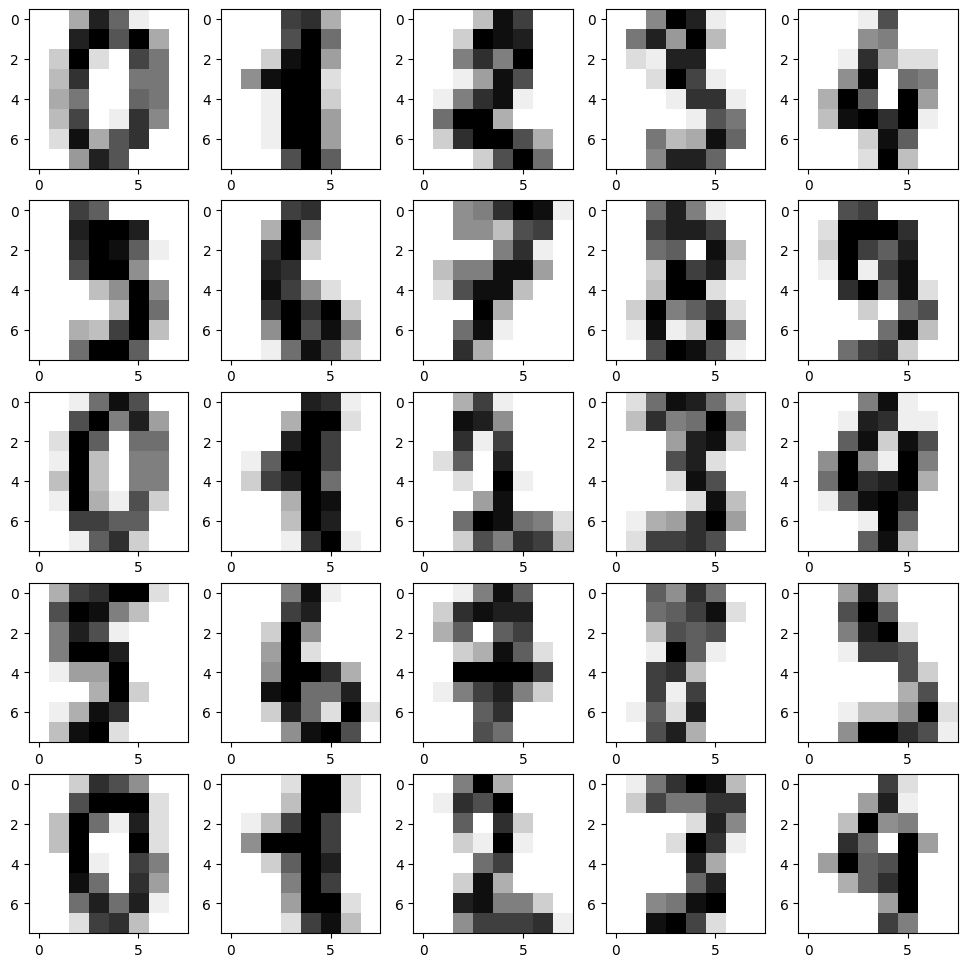

In [186]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(nx):
  for j in range(ny):
    n_imagen = i * ny + j
    axs[i, j].imshow(digits_dict["images"][n_imagen], cmap='gray_r')

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [187]:
from sklearn.model_selection import train_test_split
# features, target
X = digits.drop(columns="target").values
y = digits["target"].values

#### Modelo 1: Regresión logística

In [188]:
from sklearn.linear_model import LogisticRegression
import time
# Tenemos 1797 datos -> elegimos 20% de los datos para testear
# Dividimos el dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 281)
# Imprimimos largo de los conjuntos de entrenamiento y testeo
print('Separando informacion:\n')
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

# Creando el modelo
rlog = LogisticRegression(max_iter=200)
t_0 = time.time()
rlog.fit(X_train, Y_train) # ajustando el modelo
t_1 = time.time()
print('\nTiempo de entrenamiento: ', t_1-t_0)

Separando informacion:

numero de filas train set     :  1437
numero de filas test set      :  360

Tiempo de entrenamiento:  1.1452968120574951


In [189]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# Evaluar las métricas
def classification_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Aplicar las distintas métricas definidas
    :param df: dataframe con las columnas: ['y', 'yhat']
    :return: dataframe con las métricas especificadas
    """
    y_true = df['y']
    y_pred = df['yhat']

    accuracy = round(accuracy_score(y_true, y_pred), 4)
    recall = round(recall_score(y_true, y_pred, average='macro'), 4)
    precision = round(precision_score(y_true, y_pred, average='macro'), 4)
    fscore = round(f1_score(y_true, y_pred, average='macro'), 4)

    df_result = pd.DataFrame({'accuracy': [accuracy],
                              'recall': [recall],
                              'precision': [precision],
                              'fscore': [fscore]})

    return df_result

y_true =  list(Y_test)
y_pred = list(rlog.predict(X_test))
print('Matriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics_1 = classification_metrics(df_temp)
df_metrics_1

Matriz de confusion:
 
[[41  0  0  0  0  1  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  1  0]
 [ 0  1 26  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  1  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  2]
 [ 0  1  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  1  0  0 45  0  0]
 [ 1  2  1  0  1  1  0  0 27  0]
 [ 0  0  0  0  0  1  0  1  1 32]]


,accuracy,recall,precision,fscore
0,0.9528,0.9501,0.9519,0.9505


#### Modelo 2: K-Nearest Neighbors

In [190]:
from sklearn.neighbors import KNeighborsClassifier
# Tenemos 1797 datos -> elegimos 20% de los datos para testear
# Dividimos el dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 281)
# Imprimimos largo de los conjuntos de entrenamiento y testeo
print('Separando informacion:\n')
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

# Creando el modelo
knn = KNeighborsClassifier(n_neighbors=5)
t_0 = time.time()
knn.fit(X_train, Y_train) # ajustando el modelo
t_1 = time.time()
print('\nTiempo de entrenamiento: ', t_1-t_0)

Separando informacion:

numero de filas train set     :  1437
numero de filas test set      :  360

Tiempo de entrenamiento:  0.0011234283447265625


In [191]:
y_true =  list(Y_test)
y_pred = list(knn.predict(X_test))
print('Matriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics_2 = classification_metrics(df_temp)
df_metrics_2

Matriz de confusion:
 
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 26  1  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  2]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  2  0  1  0  0  0  0 30  0]
 [ 0  0  0  0  0  2  0  0  1 32]]


,accuracy,recall,precision,fscore
0,0.975,0.9715,0.9735,0.9722


#### Modelo 3: Árboles de decisión

In [192]:
from sklearn.tree import DecisionTreeClassifier
# Tenemos 1797 datos -> elegimos 20% de los datos para testear
# Dividimos el dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 281)
# Imprimimos largo de los conjuntos de entrenamiento y testeo
print('Separando informacion:\n')
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

# Creando el modelo
dtree = DecisionTreeClassifier()
t_0 = time.time()
dtree.fit(X_train, Y_train) # ajustando el modelo
t_1 = time.time()
print('\nTiempo de entrenamiento: ', t_1-t_0)

Separando informacion:

numero de filas train set     :  1437
numero de filas test set      :  360

Tiempo de entrenamiento:  0.038726091384887695


In [193]:
y_true =  list(Y_test)
y_pred = list(dtree.predict(X_test))
print('Matriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics_3 = classification_metrics(df_temp)
df_metrics_3

Matriz de confusion:
 
[[38  0  1  0  1  0  1  0  1  0]
 [ 0 34  2  1  2  1  1  0  2  1]
 [ 0  0 26  0  0  0  1  0  0  0]
 [ 0  1  2 28  0  0  0  0  1  0]
 [ 0  0  0  1 32  0  2  0  0  0]
 [ 0  0  0  0  0 25  0  0  1  2]
 [ 0  1  0  2  2  1 31  0  1  0]
 [ 0  2  2  0  1  0  0 40  0  1]
 [ 0  2  5  3  0  1  0  0 20  2]
 [ 0  1  1  2  0  1  0  1  4 25]]


,accuracy,recall,precision,fscore
0,0.8306,0.8328,0.8267,0.8253


#### Preguntas a responder

In [194]:
df_concat = pd.concat([df_metrics_1, df_metrics_2, df_metrics_3])
df_concat['model'] = ['Regresión Logística', 'K-Nearest Neighbors', 'Árboles de Decisión']
df_concat = df_concat.set_index('model')
df_concat

,accuracy,recall,precision,fscore
model,,,,
Regresión Logística,0.9528,0.9501,0.9519,0.9505
K-Nearest Neighbors,0.9750,0.9715,0.9735,0.9722
Árboles de Decisión,0.8306,0.8328,0.8267,0.8253


¿Cuál modelo es mejor basado en sus métricas?

De acuerdo a las métricas, el mejor modelo es K-Nearest Neighbors, el cual posee los valores más altos en las 4 métricas calculadas.

¿Cuál modelo demora menos tiempo en ajustarse?

En general, el modelo que demora menos tiempo en ajustarse es K-Nearest Neighbors.

¿Qué modelo escoges?

Escogo el modelo de K-Nearest Neighbors, pues es el que tiene los mejores valores en las métricas y el que demora menos tiempo en ajustarse.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [195]:
# Usaremos la estrategia One-vs-Rest para la curva ROC
# Usamos el modelo K-Nearest Neighbors
from sklearn.preprocessing import LabelBinarizer

# Tenemos 1797 datos -> elegimos 20% de los datos para testear
# Dividimos el dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 281)
# Creando el modelo
classifier = KNeighborsClassifier(n_neighbors=5)
y_score = classifier.fit(X_train, Y_train).predict_proba(X_test)

# Binarizamos con one-hot-encoding
label_binarizer = LabelBinarizer().fit(Y_train)
y_onehot_test = label_binarizer.transform(Y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(360, 10)

Micro-averaged One-vs-Rest ROC AUC score:
1.00
Macro-averaged One-vs-Rest ROC AUC score:
0.99


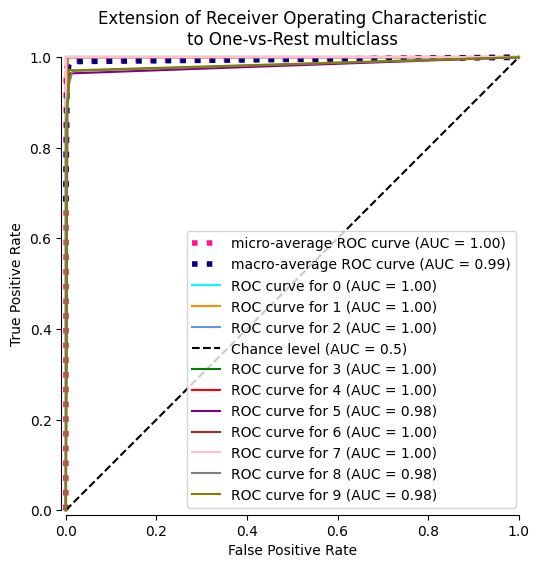

In [196]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve

# Guardamos fpr, tpr y roc_auc para todas las formas de promediar
fpr, tpr, roc_auc = dict(), dict(), dict()
# Calculamos curva micro-average ROC y ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

# Calculamos curva macro-average ROC y ROC area
n_classes = y_onehot_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolamos todas las curvas ROC a esos puntos
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # interpolacion lineal

# promediamos y calculamos AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

# Graficamos todas las curvas ROC
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "green", "red", "purple", "brown", "pink", "gray", "olive"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {class_id}",
        ax=ax,
        plot_chance_level=(class_id == 2),
        despine=True,
        color=color
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)


De acuerdo al gráfico, tanto el micro-averaged y macro-averaged ROC AUC scores están muy cerca de 1. Esto sugiere que el modelo de K-Nearest Neightbors se desempeña excepcionalmente bien para clasificar dígitos.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [197]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

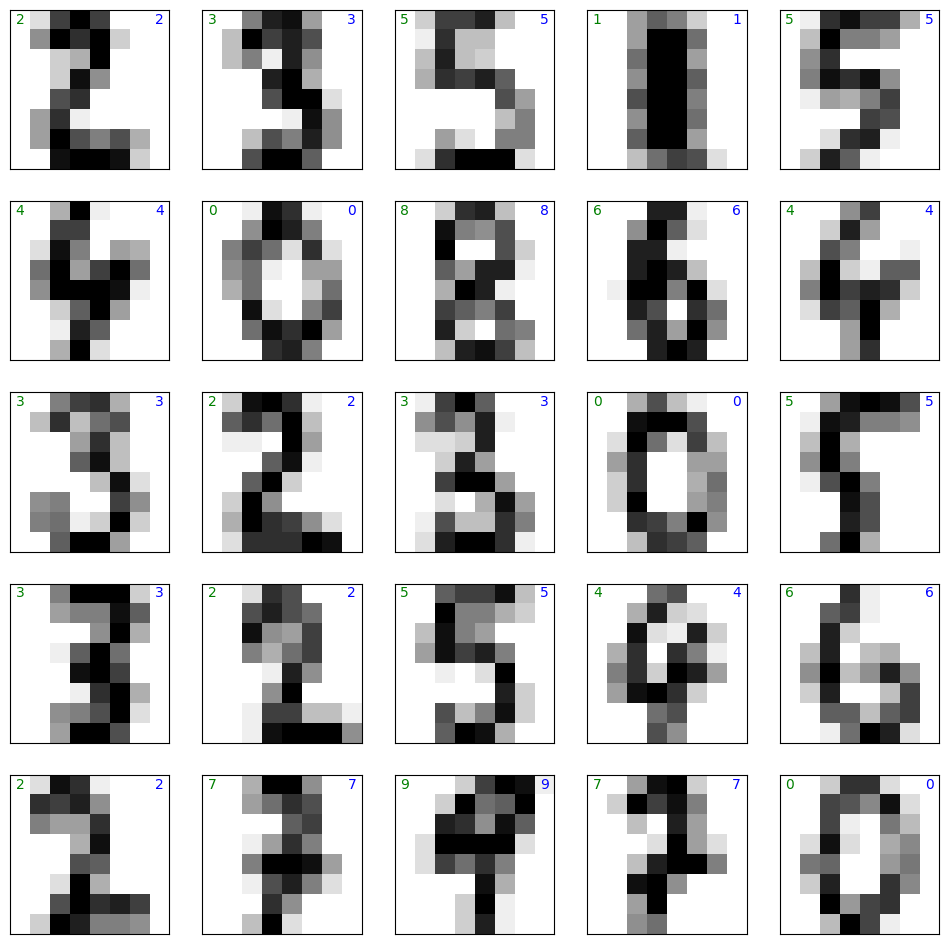

In [198]:
mostrar_resultados(digits, KNeighborsClassifier(n_neighbors=5),5,5,'correctos')

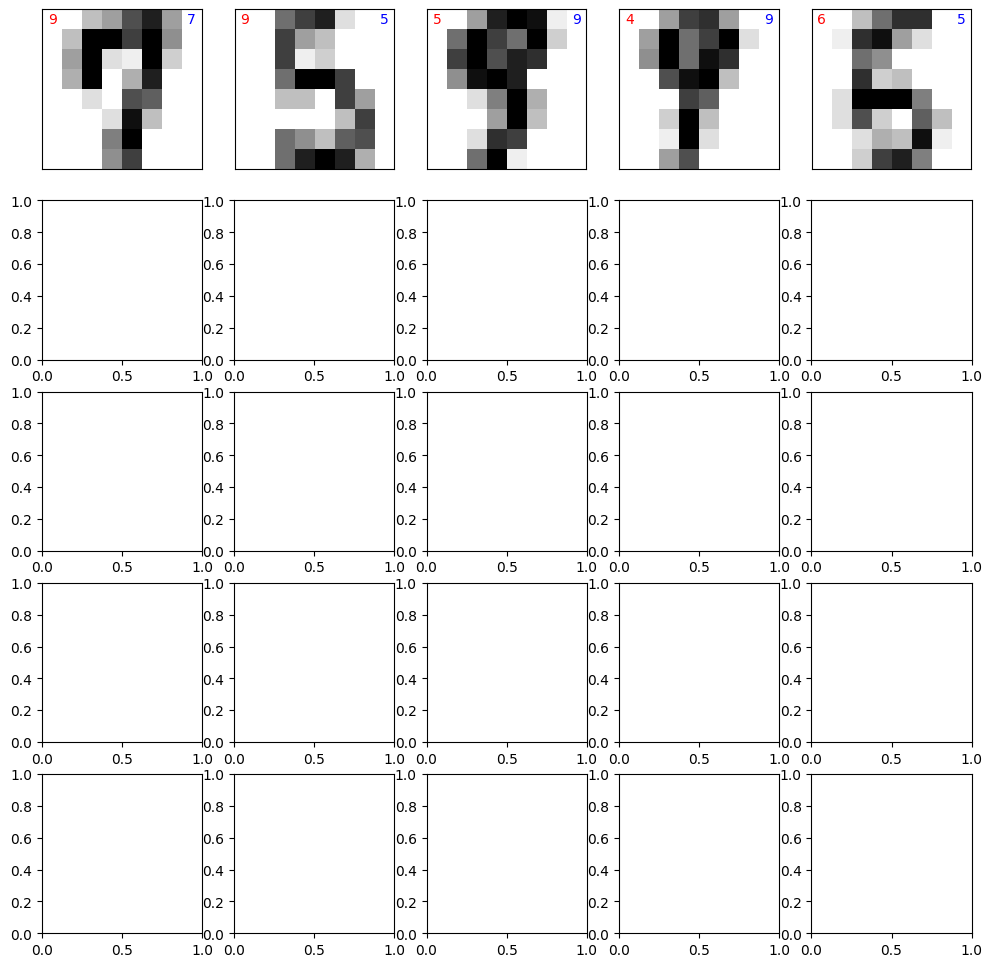

In [199]:
mostrar_resultados(digits, KNeighborsClassifier(n_neighbors=5),5,5,'incorrectos')

Las fallas entre el número predicho y el correcto pueden deberse a la similitud que tienen ciertos dígitos cuando se dibujan en manuscrita. Por ejemplo, el modelo confundió el 6 por el 5, el 4 por el 9 y el 7 por el 9, los cuales, dependiendo de cómo se escriban, es común que se confundan entre sí.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Hemos logrado entrenar tres modelos de Machine Learning para predecir imágenes de dígitos en manuscrita. De los tres, el que tuvo mejor rendimiento fue el K-Nearest Neighbors, con un F1-score de 0.97.

Los pocos errores que el modelo cometió en la predicción se debieron a las formas similares que pueden tener ciertos dígitos en manuscrita, como el 9 y el 4, o el 5 y el 6.

Pensando en trabajos futuros, una forma de reducir estos errores podría ser obteniendo más datos de números manuscritos, para aumentar el tamaño del conjunto de entrenamiento. Asimismo, se podría trabajar con imágenes más grandes, por ejemplo, de 16x16 o 32x32 pixeles; de esta manera, la resolución de las imágenes aumenta y el modelo podría mejorar su capacidad predictiva, evitando que confundan números debido a trazos muy juntos o muy difuminados.

En conclusión, el objetivo del proyecto de realizar la mejor predicción queda cumplido.